# Setup

In [ ]:
!pip install gdown


In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1cJECqTj7ExPuwCddrCPB5RTnuk5NKvCF'
output = 'CIC-IDS-2018-Dataset.zip'  # replace with your output file name and extension
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1cJECqTj7ExPuwCddrCPB5RTnuk5NKvCF
From (redirected): https://drive.google.com/uc?id=1cJECqTj7ExPuwCddrCPB5RTnuk5NKvCF&confirm=t&uuid=ebc6236e-7629-4acc-8c2e-86829c764d3c
To: /content/CIC-IDS-2018-Dataset.zip
100%|██████████| 1.67G/1.67G [00:20<00:00, 82.7MB/s]


'CIC-IDS-2018-Dataset.zip'

In [ ]:
import zipfile

zip_file = 'CIC-IDS-2018-Dataset.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('.')


In [ ]:
import pandas as pd

file_path = '/content/CIC-IDS-2018-Dataset/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv'
data = pd.read_csv(file_path)

# Display the first 5 rows of the dataframe
print(data.head())


   Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0        22         6  23/02/2018 08:18:29        1532698            11   
1       500        17  23/02/2018 08:17:45      117573855             3   
2       500        17  23/02/2018 08:17:45      117573848             3   
3        22         6  23/02/2018 08:19:55        1745392            11   
4       500        17  23/02/2018 08:18:17       89483474             6   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0            11             1179             1969              648   
1             0             1500                0              500   
2             0             1500                0              500   
3            11             1179             1969              648   
4             0             3000                0              500   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                32          0.0    

In [ ]:
file_path2 = '/content/CIC-IDS-2018-Dataset/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv'
data1 = pd.read_csv(file_path2)

<ipython-input-16-255c2dc31bfb>:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(file_path2)


In [ ]:
print(data1.columns)

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
#data["Label"].unique()
data1["Label"].unique()

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk', 'Label'],
      dtype=object)

In [ ]:
data["Label"].unique()

array(['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],
      dtype=object)

# Data Exploration

In [ ]:
import os
import pandas as pd

# Directory containing the CSV files
directory = '/content/CIC-IDS-2018-Dataset'

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv") and filename not in "/content/CIC-IDS-2018-Dataset/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv":
        file_path = os.path.join(directory, filename)
        print(filename)
        # Load the CSV file into a DataFrame
        datae = pd.read_csv(file_path)

        # Display unique labels
        print(f"Unique labels in {filename}: {datae['Label'].unique()}")

        # Count benign vs attack traffic
        benign_count = (datae['Label'] == 'Benign').sum()
        attack_count = (datae['Label'] != 'Benign').sum()

        print(f"Benign traffic count in {filename}: {benign_count}")
        print(f"Attack traffic count in {filename}: {attack_count}")
        print("\n")

Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv


<ipython-input-22-4cc025e97474>:13: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  datae = pd.read_csv(file_path)


Unique labels in Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv: ['Benign' 'Label' 'Infilteration']
Benign traffic count in Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv: 544200
Attack traffic count in Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv: 68904


Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv


<ipython-input-22-4cc025e97474>:13: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  datae = pd.read_csv(file_path)


Unique labels in Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv: ['Benign' 'Label' 'Infilteration']
Benign traffic count in Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv: 238037
Attack traffic count in Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv: 93088


Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
Unique labels in Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv: ['Benign' 'DDOS attack-LOIC-UDP' 'DDOS attack-HOIC']
Benign traffic count in Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv: 360833
Attack traffic count in Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv: 687742


Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
Unique labels in Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv: ['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']
Benign traffic count in Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv: 667626
Attack traffic count in Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv: 380949


Friday-16-02-2018_TrafficForML_CICFlowMeter.csv


<ipython-input-22-4cc025e97474>:13: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  datae = pd.read_csv(file_path)


Unique labels in Friday-16-02-2018_TrafficForML_CICFlowMeter.csv: ['Benign' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk' 'Label']
Benign traffic count in Friday-16-02-2018_TrafficForML_CICFlowMeter.csv: 446772
Attack traffic count in Friday-16-02-2018_TrafficForML_CICFlowMeter.csv: 601803


Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
Unique labels in Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv: ['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection']
Benign traffic count in Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv: 1048213
Attack traffic count in Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv: 362


Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
Unique labels in Friday-02-03-2018_TrafficForML_CICFlowMeter.csv: ['Benign' 'Bot']
Benign traffic count in Friday-02-03-2018_TrafficForML_CICFlowMeter.csv: 762384
Attack traffic count in Friday-02-03-2018_TrafficForML_CICFlowMeter.csv: 286191


Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
Unique labels in Fr

# Data Preprocessing

In [ ]:
import os
import pandas as pd
import numpy as np

# Define the CSV files and the fractions of benign and attack traffic to keep
files_and_fractions = {
    'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv': {'benign': 0.75, 'attack': 1.0},
    'Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv': {'benign': 0.5, 'attack': 0.67},
    'Friday-23-02-2018_TrafficForML_CICFlowMeter.csv': {'benign': 100000/1048009, 'attack': 1.0},
    'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv': {'benign': 100000/1048213, 'attack': 1.0}
}

combined_data = pd.DataFrame()

for filename, fractions in files_and_fractions.items():
    file_path = os.path.join('/content/CIC-IDS-2018-Dataset', filename)

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Remove any rows that are headers
    data = data[data['Label'] != 'Label']

    # Separate benign and attack traffic
    benign = data[data['Label'] == 'Benign']
    attack = data[data['Label'] != 'Benign']

    # Drop the specified fraction of benign and attack traffic
    benign = benign.sample(frac=fractions['benign'], random_state=1)
    attack = attack.sample(frac=fractions['attack'], random_state=1)

    # Combine the benign and attack traffic and add it to the combined data
    combined_data = pd.concat([combined_data, benign, attack])

# Reset the index of the combined data
combined_data.reset_index(drop=True, inplace=True)

columns_to_drop = ['Timestamp']


# Drop the specified columns
combined_data = combined_data.drop(columns=columns_to_drop)

# Save the DataFrame to a new CSV file
combined_data.to_csv('processed_data.csv', index=False)

# Print the size of the file in GB
file_size = os.path.getsize('processed_data.csv') / (1024 * 1024 * 1024)
print(f"The size of the processed_data.csv file is {file_size} GB")


The size of the processed_data.csv file is 0.5458655431866646 GB


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Save the DataFrame to a new CSV file
combined_data.to_csv('/content/gdrive/My Drive/processed_data.csv', index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/gdrive')
combined_data = pd.read_csv('/content/gdrive/My Drive/processed_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
combined_data["Label"].unique()
benign_count = (combined_data['Label'] == 'Benign').sum()
attack_count = (combined_data['Label'] != 'Benign').sum()

# Print the counts
print(f"Benign traffic count: {benign_count}")
print(f"Attack traffic count: {attack_count}")

# Normalize output for Classification

In [ ]:
combined_data['Label'] = combined_data['Label'].apply(lambda x: False if x == 'Benign' else True)

print(combined_data['Label'].dtype)
combined_data.info()

bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723800 entries, 0 to 1723799
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Flow Duration      int64  
 3   Tot Fwd Pkts       int64  
 4   Tot Bwd Pkts       int64  
 5   TotLen Fwd Pkts    int64  
 6   TotLen Bwd Pkts    int64  
 7   Fwd Pkt Len Max    int64  
 8   Fwd Pkt Len Min    int64  
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    int64  
 12  Bwd Pkt Len Min    int64  
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       int64  
 20  Flow IAT Min       int64  
 21  Fwd IAT Tot        int64  
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        int64  
 25  Fwd IAT Min  

In [ ]:
import pandas as pd
import numpy as np


correlation_matrix = combined_data.corr()

# Identify highly correlated features (threshold = 0.95)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Print the highly correlated features
print("Highly correlated features:", correlated_features)

# Analyzing correlation with the target variable ('Label')
corr_with_label = abs(correlation_matrix["Label"])

# Selecting features with low correlation to the target (threshold = 0.05)
weak_features = corr_with_label[corr_with_label < 0.05].index
print("\nFeatures with weak correlation to the target:", weak_features)

Highly correlated features: {'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Tot', 'Subflow Bwd Pkts', 'Fwd IAT Mean', 'Bwd Seg Size Avg', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Std', 'Subflow Bwd Byts', 'Idle Std', 'SYN Flag Cnt', 'TotLen Bwd Pkts', 'Pkt Len Mean', 'Fwd Seg Size Avg', 'Bwd Pkts/s', 'Flow IAT Max', 'Idle Mean', 'Fwd IAT Std', 'Subflow Fwd Pkts', 'Flow IAT Min', 'Fwd Header Len', 'Pkt Len Min', 'ECE Flag Cnt', 'Active Min', 'Fwd IAT Min', 'Idle Max', 'Pkt Len Std', 'Subflow Fwd Byts', 'Fwd Pkts/s', 'Fwd Act Data Pkts'}

Features with weak correlation to the target: Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'FIN Flag Cnt',
       'PSH Flag Cnt', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Fwd Act 

In [ ]:
# Drop the weak features from the DataFrame
combined_data_filtered = combined_data.drop(weak_features, axis=1)

# Print the columns of the filtered DataFrame to verify
combined_data_filtered.dropna()
print(combined_data_filtered.columns)
combined_data_filtered.info()

Index(['Dst Port', 'Protocol', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Fwd IAT Mean', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Min',
       'Label'

In [ ]:
correlation_matrix = combined_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optionally, you can print the correlation matrix with formatting for better readability
print(correlation_matrix.to_string())


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

pd.plotting.scatter_matrix(combined_data, alpha=0.5, figsize=(15, 15))
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

combined_data_filtered = combined_data_filtered.reset_index(drop=True)
combined_data_filtered.dropna()

combined_data_filtered = combined_data_filtered.reset_index(drop=True)
X = combined_data_filtered.drop('Label', axis=1)
y = combined_data_filtered['Label']


# Split data into train, validation, and test sets (80/10/10 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.12, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.12, random_state=42)

# Drop rows with NaNs or infinities from each set separately
X_train_dropped = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train_dropped = y_train[X_train_dropped.index]

X_val_dropped = X_val.replace([np.inf, -np.inf], np.nan).dropna()
y_val_dropped = y_val[X_val_dropped.index]

X_test_dropped = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test_dropped = y_test[X_test_dropped.index]

# Create Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train_dropped, y_train_dropped)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val_dropped)

# Evaluate the model on the validation set (using y_val_dropped for consistency)
val_accuracy = accuracy_score(y_val_dropped, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

# Make predictions on the test set (using X_test_dropped)
y_test_pred = rf_model.predict(X_test_dropped)

# Evaluate the model on the test set (using y_test_dropped)
test_accuracy = accuracy_score(y_test_dropped, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Validation Accuracy: 0.9999118860245728
Test Accuracy: 0.999898258278627


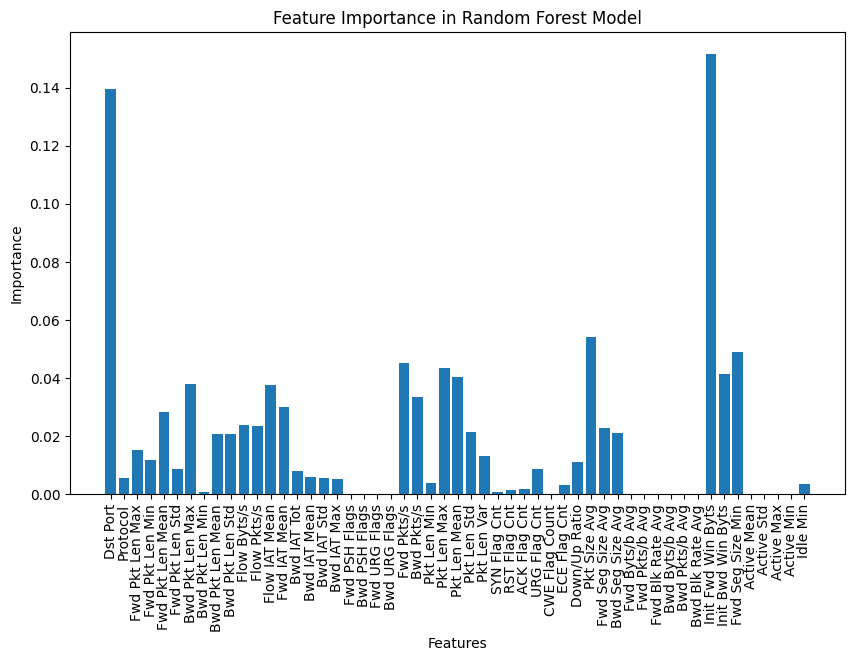

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Create a feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

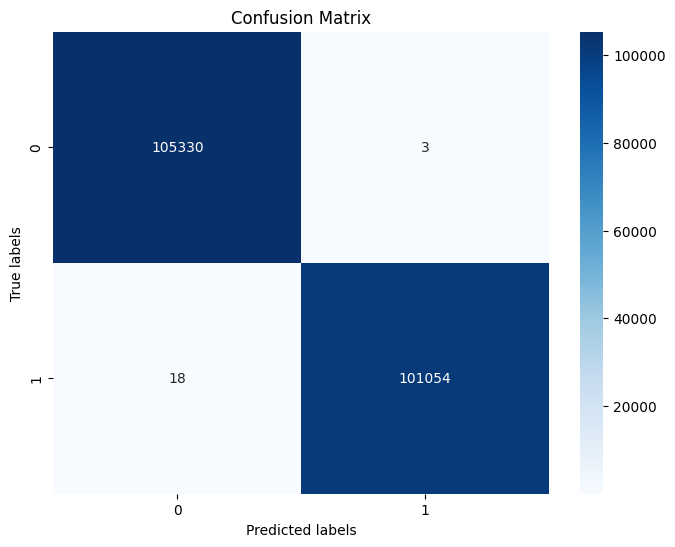

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions on the test set (or validation set)
y_pred = rf_model.predict(X_test_dropped)

# Create confusion matrix
cm = confusion_matrix(y_test_dropped, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()